## Data Scientist Challenge

#### Question 1

##### Listening behavior on playlists is analyzed using the following tables:
● playlists table with columns:

○ user_id : the user who uploaded the playlist

○ playlist_id : the unique identifier of the playlist

● listings table with columns:

○ playlist_id : the unique identifier of the playlist

○ track_id : the unique identifier of the track

○ position : the position of this track in the playlist

○ track_duration : the length of the track recording (in milliseconds)

● plays table with columns:

○ timestamp : the time the play occurred

○ user_id : the user who played the given track

○ track_id : the unique identifier of the track

○ playlist_id : the unique identifier of the playlist (set to 0 if the play did not happen in a playlist)

○ listening_duration : the duration that the user listened to the track (in milliseconds)

### 1.1 Given a user X, what are their 3 most listened to playlists?

###### Approach
1. Inner query will return the listned playlist of user x & outer query return the top 3 playlist id of User X.

2.  "X user id" is placeholder to replace the user id of X.

In [ ]:
Select playlist_id 
(Select 
playlist_id, 
sum(listening_duration) as "Duration"
from plays where user_id="X user id" 
Group by playlist_id
Order by Duration desc) a 
where rownum<=3 

### 1.2 What is the percentage of users that create playlists only containing dj-sets? Assume a dj-set is a track with a duration longer than 10min.


###### Approach
1. Couting the distinct customer of playlist in which all track have duration more than 10 min & on other hand counting the total distinct customer.

2. Calculating the % based on above query results.

In [ ]:
select 
((Select count(distinct(user_id)) from listing where playlist_id in 
  (select playlist_id from listings group by playlist_id having track_duration>600000))/
 (select count(user_id) from playlist))*100 
from dual

### 1.3 For a user X, recommend 5 playlists they would like that they haven’t heard before. Go for a practical over elaborate solution and stick to something that works well in SQL.


###### Approach 1
Recommending the song which has listened mostly.

1. Using inner query finding out the list of playlist which listend mostly but not by User X.
2. Suggesting the top 5 playlist based on listening Duration.

In [ ]:
Select playlist_id 
(Select playlist_id, 
sum(listening_duration) as "Duration"
from plays 
where           
user_id !="X user id" 
Group by playlist_id
Order by Duration desc) a 
where rownum<=5 

###### Approach 2
User X will be more likely to listen the songs which other people listening on same timestamp.

Recommending the song based on morning, afternoon, evening timestamp which will high probability user X will like it.

1. Using inner query finding out the list of playlist which listend on User X timestamp but not by User X.
2. Suggesting the top 5 playlist based on listening Duration. 

In [ ]:
Select playlist_id 
(Select playlist_id, 
sum(listening_duration) as "Duration"
from plays 
where 
timestamp in (select timestamp from plays where user_id="X user id")                   
and user_id !="X user id" 
Group by playlist_id
Order by Duration desc) a 
where rownum<=5 

#### In first instance, We can recommend using both approach then by doing A/B testing usasge of listner, we can verify which approach is giving good result.

## Question 2


What factors affect a listener’s choice to skip a recommended track

#### MetaData 
JSON-formatted dataset describing a sample of users’ listening behavior on queues of tracks generated by some of SoundCloud’s recommender systems. We would like to know what factors affect a listener’s choice to skip a recommended track.

In this dataset, each record (i.e., each sub-list of the “data” field) represents the total amount of time the user spent listening to a track that had been recommended before a different track was played or the listening session ended.

The provided attributes (in the “columns” field) are:

● ts : the time the user listened to the recommended track (as Unix timestamp)

● country_code : the two-character country abbreviation where the user was located at the
time of listening

● client_version : the version of the client that the listener was using

● listening_context : the section of the SoundCloud web app where the user listened to the
recommended track

1. “collection”: any of the pages in the Collection section
2. “you”: the listener’s own profile page
3.  “search”: any of the pages in the Search experience
4. “stream”: the page of the Stream experience
5. “personal-recommended’: the page of the Discover experience for personalized recommendations
6. “charts”: the page of the Charts experience for trending content discovery
7. “tracks”: the dedicated page of an uploaded track
8. “users”: the profile page of another user (not the one listening)
9. “playlists”: the dedicated page of a playlist

● recommender_algorithm_name : the name of the algorithm that produced the track recommendation for the listener

○ “content-based”: an implementation of content-based filtering
○ “collaborative”: an implementation of collaborative filtering
○ “hybrid”: a hybrid implementation of content-based and collaborative filtering
○ “fallback”: a static list of the popular tracks, used only as a fallback strategy

● track_id : the unique identifier of the recommended track

● track_genre_category : the broad genre category describing the recommended track

● track_upload_date : the date the recommended track was uploaded (as Unix timestamp)

● track_duration : the length of the recommended track recording (in milliseconds)

● listen_duration : the duration that the user listened to the recommended track (in milliseconds)

● listener_id : the unique identifier of the user who listened to the recommended track

● listener_signup_date : the date the listener created their SoundCloud account (as Unix timestamp)

● listener_top_genre_category_listened : the genre category that the user has most frequently listened to (based on all their past listening in all contexts)

● listener_prev_month_listening_time : the total duration that the user listened in the previous month (in all contexts)

● listener_prev_month_avg_daily_tracks_listened : the daily mean number of distinct tracks that the user listened in the previous month (in all contexts)



### Importing the required packages

In [1]:
import pandas as pd #Used for input/output & Data exploration
from datetime import datetime #Used for handling date columns 
import missingno #Used for Checking missing values
import matplotlib.pyplot as plt #Used for visulization
import seaborn as sns #Used for Visulization
#import math
import numpy as np
%matplotlib inline

In [37]:
df=pd.read_json("sc_data_science_challenge.json",orient='split')

In [38]:
df.shape

(828169, 15)

In [39]:
df.to_csv("music.csv")

In [40]:
df.head()

,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened
0,1467398683,GB,204.0.20,tracks,content-based,b47911d0e80d1a8a959a2b726654bbfa,Dance & Electronic,1466640000,413933,413933,0001d5755511cae40e5b32d83a3decce,1324771200,HipHop & R&B,617270940.0,22.5
1,1467398924,GB,204.0.20,tracks,content-based,1f5e4bc82ba7fc802f780870f9b69191,HipHop & R&B,1466726400,402640,110722,0001d5755511cae40e5b32d83a3decce,1324771200,HipHop & R&B,617270940.0,22.5
2,1467820636,GB,204.0.20,users,content-based,092495283958e5d00f61cf2afe970d83,Pop,1467072000,494811,193818,0001d5755511cae40e5b32d83a3decce,1324771200,HipHop & R&B,617270940.0,22.5
3,1467401951,US,36.0.8,collection,content-based,211cd7be59941679f5ea847879b3b19b,HipHop & R&B,1402272000,361585,361585,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5
4,1467402159,US,36.0.8,collection,content-based,0e7ca1a7524aba84473540fa0d0ec75f,Pop,1448668800,373700,160162,000264c5b34ad04999535c8b6a8b86e2,1379376000,HipHop & R&B,112239180.0,10.5


### Handling Date columns

In [41]:
#Convert unix timestamp to Datetime
df['ts']=df['ts'].apply(lambda x:datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df['track_upload_date']=df['track_upload_date'].apply(lambda x:datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df['listener_signup_date']=df['listener_signup_date'].apply(lambda x:datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [42]:
df.head()

,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened
0,2016-07-01 18:44:43,GB,204.0.20,tracks,content-based,b47911d0e80d1a8a959a2b726654bbfa,Dance & Electronic,2016-06-23 00:00:00,413933,413933,0001d5755511cae40e5b32d83a3decce,2011-12-25 00:00:00,HipHop & R&B,617270940.0,22.5
1,2016-07-01 18:48:44,GB,204.0.20,tracks,content-based,1f5e4bc82ba7fc802f780870f9b69191,HipHop & R&B,2016-06-24 00:00:00,402640,110722,0001d5755511cae40e5b32d83a3decce,2011-12-25 00:00:00,HipHop & R&B,617270940.0,22.5
2,2016-07-06 15:57:16,GB,204.0.20,users,content-based,092495283958e5d00f61cf2afe970d83,Pop,2016-06-28 00:00:00,494811,193818,0001d5755511cae40e5b32d83a3decce,2011-12-25 00:00:00,HipHop & R&B,617270940.0,22.5
3,2016-07-01 19:39:11,US,36.0.8,collection,content-based,211cd7be59941679f5ea847879b3b19b,HipHop & R&B,2014-06-09 00:00:00,361585,361585,000264c5b34ad04999535c8b6a8b86e2,2013-09-17 00:00:00,HipHop & R&B,112239180.0,10.5
4,2016-07-01 19:42:39,US,36.0.8,collection,content-based,0e7ca1a7524aba84473540fa0d0ec75f,Pop,2015-11-28 00:00:00,373700,160162,000264c5b34ad04999535c8b6a8b86e2,2013-09-17 00:00:00,HipHop & R&B,112239180.0,10.5


In [43]:
def time_vars_with_day(df, var):
    df[var +'_Year'] = pd.DatetimeIndex(df[var]).year
        
    df[var +'_Month'] = pd.DatetimeIndex(df[var]).month
    
    df[var +'_Day'] = pd.DatetimeIndex(df[var]).weekday
    
    df[var +'_Hour'] = pd.DatetimeIndex(df[var]).hour

In [44]:
time_vars_with_day(df,'ts')
time_vars_with_day(df,'track_upload_date')
time_vars_with_day(df,'listener_signup_date')

In [45]:
df=df.drop(['ts','track_upload_date','listener_signup_date'],axis=1)

In [46]:
df.head()

,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_duration,listen_duration,listener_id,listener_top_genre_category_listened,...,ts_Day,ts_Hour,track_upload_date_Year,track_upload_date_Month,track_upload_date_Day,track_upload_date_Hour,listener_signup_date_Year,listener_signup_date_Month,listener_signup_date_Day,listener_signup_date_Hour
0,GB,204.0.20,tracks,content-based,b47911d0e80d1a8a959a2b726654bbfa,Dance & Electronic,413933,413933,0001d5755511cae40e5b32d83a3decce,HipHop & R&B,...,4,18,2016,6,3,0,2011,12,6,0
1,GB,204.0.20,tracks,content-based,1f5e4bc82ba7fc802f780870f9b69191,HipHop & R&B,402640,110722,0001d5755511cae40e5b32d83a3decce,HipHop & R&B,...,4,18,2016,6,4,0,2011,12,6,0
2,GB,204.0.20,users,content-based,092495283958e5d00f61cf2afe970d83,Pop,494811,193818,0001d5755511cae40e5b32d83a3decce,HipHop & R&B,...,2,15,2016,6,1,0,2011,12,6,0
3,US,36.0.8,collection,content-based,211cd7be59941679f5ea847879b3b19b,HipHop & R&B,361585,361585,000264c5b34ad04999535c8b6a8b86e2,HipHop & R&B,...,4,19,2014,6,0,0,2013,9,1,0
4,US,36.0.8,collection,content-based,0e7ca1a7524aba84473540fa0d0ec75f,Pop,373700,160162,000264c5b34ad04999535c8b6a8b86e2,HipHop & R&B,...,4,19,2015,11,5,0,2013,9,1,0


### Checking missing value

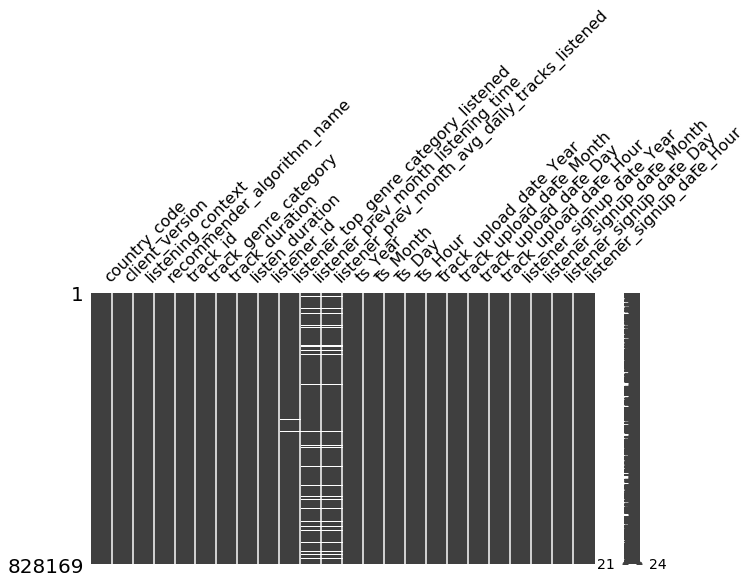

In [47]:
#Record Level missing value check

missingno.matrix(df,figsize=(10,5))

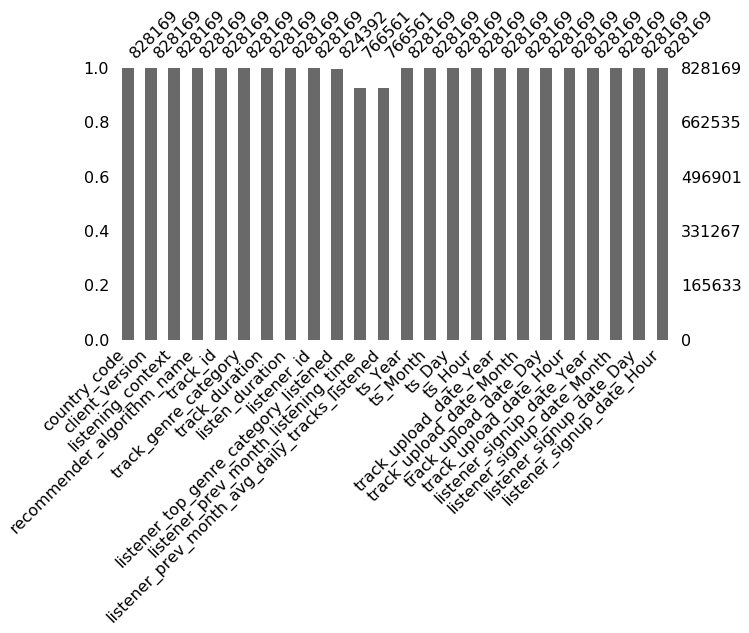

In [48]:
#Missing value distribution
missingno.bar(df,figsize=(10,5))

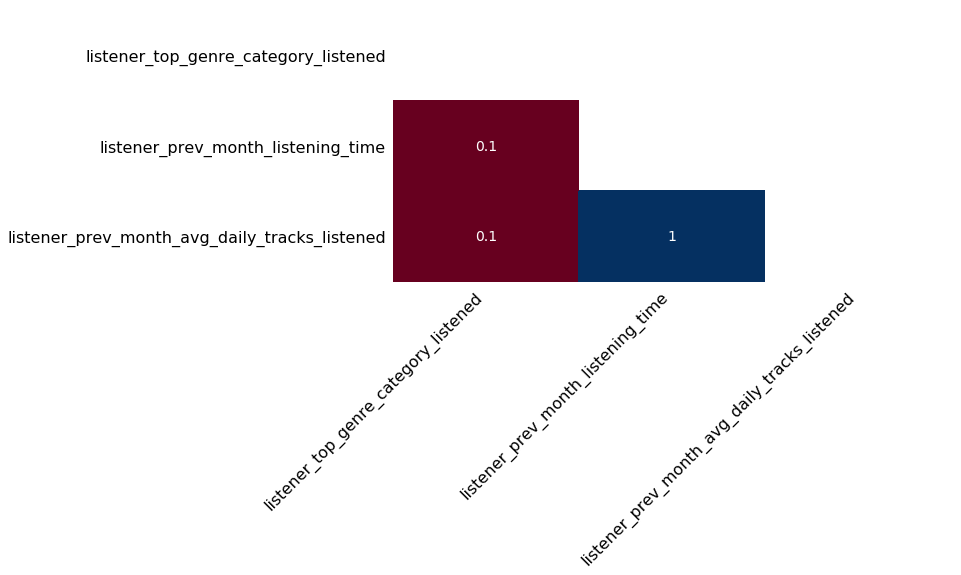

In [49]:
#Cross Section in Missing Values columns
missingno.heatmap(df,figsize=(10,5))

###### Missing %

In [50]:
print("Missing % in listener_prev_month_listening_time",round((df['listener_prev_month_listening_time'].isnull().sum()/df['listener_prev_month_listening_time'].count())*100),2)

print("Missing % in listener_prev_month_avg_daily_tracks_listened",round((df['listener_prev_month_avg_daily_tracks_listened'].isnull().sum()/df['listener_prev_month_avg_daily_tracks_listened'].count())*100),2)

print("Missing % in listener_top_genre_category_listened",round((df['listener_top_genre_category_listened'].isnull().sum()/df['listener_top_genre_category_listened'].count())*100),2)

Missing % in listener_prev_month_listening_time 8.0 2
Missing % in listener_prev_month_avg_daily_tracks_listened 8.0 2
Missing % in listener_top_genre_category_listened 0.0 2


#### Missing Value check Summary

Below columns are having missing value which means we haven't captured information for some listner.

1. listener_top_genre_category_listened              3777
2. listener_prev_month_listening_time                61608
3. listener_prev_month_avg_daily_tracks_listened     61608

Hypothesis is 8 % of listner may not listen the song in previous month or we were not able to capture the information.

So Based on above hypothesis removing the missing listner records.

In [51]:
df=df.dropna()

In [52]:
df.shape

(765092, 24)

#### Adding derived columns

In [53]:
df['duration_diff']=df['track_duration']-df['listen_duration']

In [54]:
df.loc[:,['track_duration','listen_duration','duration_diff']].head()

,track_duration,listen_duration,duration_diff
0,413933,413933,0
1,402640,110722,291918
2,494811,193818,300993
3,361585,361585,0
4,373700,160162,213538


In [55]:
#Handling client version
df['client_ver_level1']=df.client_version.str.split(".").str[0].tolist()
df['client_ver_level2']=df.client_version.str.split(".").str[1].tolist()
df['client_ver_level3']=df.client_version.str.split(".").str[2].tolist()


In [56]:
# using dictionary to convert specific columns to required data types
convert_dict = {'ts_Year': object, 
                'ts_Month': object,
                'ts_Day': object,
                'ts_Hour': object,
                'track_upload_date_Year':object,
                'track_upload_date_Month':object,
                 'track_upload_date_Day':object,
                  'track_upload_date_Hour':object,
                'listener_signup_date_Year':object,
                'listener_signup_date_Month':object,
                'listener_signup_date_Day':object,
                'listener_signup_date_Hour':object,                       
               } 
  
df = df.astype(convert_dict) 
#print(df.dtypes) 

#### Droping  columns

In [57]:
#Removing the track_upload_date_Hour & listener_signup_date_Hour as both are having 0 hours only.
#Removing ts_year as it just have 2016 for all the records.
#Removing id columns 'track_id' & 'listener_id'

data=df.drop(['client_version','track_upload_date_Hour',
              'listener_signup_date_Hour','ts_Year','track_id','listener_id'],axis=1)

#### Descriptive Analytics of data

In [58]:
data.describe()

,track_duration,listen_duration,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,duration_diff
count,7.650920e+05,7.650920e+05,7.650920e+05,765092.000000,7.650920e+05
mean,5.226777e+05,2.982132e+05,7.960725e+09,45.794938,2.244645e+05
std,9.907958e+05,5.270887e+05,1.011642e+10,43.165134,8.619153e+05
min,0.000000e+00,-7.049300e+04,0.000000e+00,1.500000,-2.393515e+07
25%,3.025630e+05,3.969700e+04,1.183196e+09,16.500000,0.000000e+00
50%,3.743880e+05,2.785620e+05,4.417111e+09,33.000000,0.000000e+00
75%,4.530220e+05,3.950080e+05,1.101478e+10,61.500000,2.856032e+05
max,4.200407e+07,3.465427e+07,1.264765e+11,637.500000,4.188594e+07


In [59]:
data.describe(include=['O'])

,country_code,listening_context,recommender_algorithm_name,track_genre_category,listener_top_genre_category_listened,ts_Month,ts_Day,ts_Hour,track_upload_date_Year,track_upload_date_Month,track_upload_date_Day,listener_signup_date_Year,listener_signup_date_Month,listener_signup_date_Day,client_ver_level1,client_ver_level2,client_ver_level3
count,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092
unique,2,9,4,13,12,2,7,24,10,12,7,10,12,7,47,14,9
top,US,tracks,content-based,HipHop & R&B,HipHop & R&B,7,6,21,2016,6,0,2015,3,0,204,0,0
freq,484990,443121,685582,407113,506331,652686,127757,45610,309408,130076,129604,188183,77418,122250,506766,716447,554208


In [60]:
#Writing back to do data exploration usig Tableau
#df.to_csv('songdata.csv')

### Feature Encoding

#### 1. One hot encoding

In [61]:
country=pd.get_dummies(data['country_code'],drop_first=True)
context=pd.get_dummies(data['listening_context'],drop_first=True)
algo=pd.get_dummies(data['recommender_algorithm_name'],drop_first=True)
trackgenre=pd.get_dummies(data['track_genre_category'],drop_first=True)
listnergenre=pd.get_dummies(data['listener_top_genre_category_listened'],drop_first=True)


In [62]:
data =pd.concat([data,country,context,algo,trackgenre,listnergenre],axis=1)

In [63]:
#Removing one hot encoded base columns

data=data.drop(['country_code','listening_context','recommender_algorithm_name',
                'track_genre_category','listener_top_genre_category_listened'],axis=1)

#### 2. Ordinal Encoding

In [71]:
def order_encod(data,column):
    cats = list(data.groupby([column])['duration_diff'].mean().sort_values().index)
    cats
    ord_dict = {}
    i=0
    for cat in cats:
        ord_dict[cat] = i
        i = i+1
    print(column+" Encoding :=",ord_dict)
    data[column] = data[column].map(ord_dict)

In [72]:
order_encod(data,'ts_Month')
order_encod(data,'ts_Day')
order_encod(data,'ts_Hour')
order_encod(data,'track_upload_date_Year')
order_encod(data,'track_upload_date_Month')
order_encod(data,'track_upload_date_Day')
order_encod(data,'listener_signup_date_Year')
order_encod(data,'listener_signup_date_Month')
order_encod(data,'listener_signup_date_Day')
order_encod(data,'client_ver_level1')
order_encod(data,'client_ver_level2')
order_encod(data,'client_ver_level3')

ts_Month Encoding := {6: 0, 7: 1}
ts_Day Encoding := {1: 0, 0: 1, 3: 2, 5: 3, 6: 4, 2: 5, 4: 6}
ts_Hour Encoding := {8: 0, 11: 1, 10: 2, 9: 3, 12: 4, 7: 5, 6: 6, 2: 7, 1: 8, 3: 9, 13: 10, 4: 11, 14: 12, 22: 13, 21: 14, 20: 15, 0: 16, 19: 17, 23: 18, 16: 19, 5: 20, 15: 21, 17: 22, 18: 23}
track_upload_date_Year Encoding := {2008: 0, 2012: 1, 2014: 2, 2013: 3, 2011: 4, 2010: 5, 2015: 6, 2009: 7, 2016: 8, 2007: 9}
track_upload_date_Month Encoding := {10: 0, 8: 1, 9: 2, 11: 3, 12: 4, 1: 5, 3: 6, 2: 7, 4: 8, 5: 9, 7: 10, 6: 11}
track_upload_date_Day Encoding := {5: 0, 4: 1, 0: 2, 3: 3, 6: 4, 2: 5, 1: 6}
listener_signup_date_Year Encoding := {2016: 0, 2015: 1, 2014: 2, 2012: 3, 2013: 4, 2011: 5, 2009: 6, 2010: 7, 2008: 8, 2007: 9}
listener_signup_date_Month Encoding := {2: 0, 5: 1, 1: 2, 4: 3, 3: 4, 7: 5, 8: 6, 11: 7, 10: 8, 6: 9, 9: 10, 12: 11}
listener_signup_date_Day Encoding := {5: 0, 6: 1, 0: 2, 3: 3, 2: 4, 1: 5, 4: 6}
client_ver_level1 Encoding := {'88': 0, '132': 1, '136': 2, '144': 3

In [73]:
data.head()

,track_duration,listen_duration,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,ts_Month,ts_Day,ts_Hour,track_upload_date_Year,track_upload_date_Month,track_upload_date_Day,...,Dance & Electronic,HipHop & R&B,Jazz,Latin,Metal,Pop,Reggae,Rock,Speech,World
0,413933,413933,617270940.0,22.5,1,6,23,8,11,3,...,0,1,0,0,0,0,0,0,0,0
1,402640,110722,617270940.0,22.5,1,6,23,8,11,1,...,0,1,0,0,0,0,0,0,0,0
2,494811,193818,617270940.0,22.5,1,5,21,8,11,6,...,0,1,0,0,0,0,0,0,0,0
3,361585,361585,112239180.0,10.5,1,6,17,2,11,2,...,0,1,0,0,0,0,0,0,0,0
4,373700,160162,112239180.0,10.5,1,6,17,6,3,0,...,0,1,0,0,0,0,0,0,0,0


In [74]:
col=data.columns
col

Index(['track_duration', 'listen_duration',
       'listener_prev_month_listening_time',
       'listener_prev_month_avg_daily_tracks_listened', 'ts_Month', 'ts_Day',
       'ts_Hour', 'track_upload_date_Year', 'track_upload_date_Month',
       'track_upload_date_Day', 'listener_signup_date_Year',
       'listener_signup_date_Month', 'listener_signup_date_Day',
       'duration_diff', 'client_ver_level1', 'client_ver_level2',
       'client_ver_level3', 'US', 'collection', 'personal-recommended',
       'playlists', 'search', 'stream', 'tracks', 'users', 'you',
       'content-based', 'fallback', 'hybrid', 'Country', 'Dance & Electronic',
       'HipHop & R&B', 'Jazz', 'Latin', 'Metal', 'Pop', 'Reggae', 'Rock',
       'Speech', 'Unknown', 'World', 'Country', 'Dance & Electronic',
       'HipHop & R&B', 'Jazz', 'Latin', 'Metal', 'Pop', 'Reggae', 'Rock',
       'Speech', 'World'],
      dtype='object')

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data_sc=sc.fit_transform(data)

C:\Users\sachin.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sachin.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [76]:
data_sc = pd.DataFrame.from_records(data_sc)

In [77]:
data_sc.columns=col

In [78]:
data_sc.head()

,track_duration,listen_duration,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,ts_Month,ts_Day,ts_Hour,track_upload_date_Year,track_upload_date_Month,track_upload_date_Day,...,Dance & Electronic,HipHop & R&B,Jazz,Latin,Metal,Pop,Reggae,Rock,Speech,World
0,-0.109755,0.219545,-0.725895,-0.539671,0.414995,1.508188,1.545768,0.969570,1.260055,-0.129814,...,-0.549338,0.714878,-0.023127,-0.055743,-0.039931,-0.20415,-0.053823,-0.15896,-0.073984,-0.164449
1,-0.121153,-0.355711,-0.725895,-0.539671,0.414995,1.508188,1.545768,0.969570,1.260055,-1.176519,...,-0.549338,0.714878,-0.023127,-0.055743,-0.039931,-0.20415,-0.053823,-0.15896,-0.073984,-0.164449
2,-0.028126,-0.198060,-0.725895,-0.539671,0.414995,1.000399,1.240853,0.969570,1.260055,1.440244,...,-0.549338,0.714878,-0.023127,-0.055743,-0.039931,-0.20415,-0.053823,-0.15896,-0.073984,-0.164449
3,-0.162589,0.120230,-0.775817,-0.817673,0.414995,1.508188,0.631023,-1.451780,1.260055,-0.653167,...,-0.549338,0.714878,-0.023127,-0.055743,-0.039931,-0.20415,-0.053823,-0.15896,-0.073984,-0.164449
4,-0.150362,-0.261913,-0.775817,-0.817673,0.414995,1.508188,0.631023,0.162453,-1.053186,-1.699872,...,-0.549338,0.714878,-0.023127,-0.055743,-0.039931,-0.20415,-0.053823,-0.15896,-0.073984,-0.164449


Step:= 1
wcss:= 39784784.000000015
Step:= 2
wcss:= 38139667.025578946
Step:= 3
wcss:= 37050149.67940028
Step:= 4
wcss:= 36069410.91726074
Step:= 5
wcss:= 35434185.61752384
Step:= 6
wcss:= 34633094.865003176
Step:= 7
wcss:= 33789990.397768684
Step:= 8
wcss:= 32736984.18763007
Step:= 9
wcss:= 31979650.889426496
Step:= 10
wcss:= 31213856.730725262
Step:= 11
wcss:= 30542348.39108631
Step:= 12
wcss:= 29979052.003869005
Step:= 13
wcss:= 28946813.938001942
Step:= 14
wcss:= 28118554.56325444
Step:= 15
wcss:= 27593818.590755116
Step:= 16
wcss:= 26974278.947631676
Step:= 17
wcss:= 26030681.186713886
Step:= 18
wcss:= 25538325.473615285
Step:= 19
wcss:= 24829289.943271216


Text(0,0.5,'WCSS')

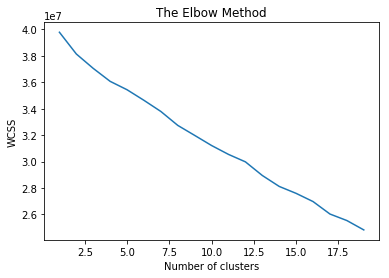

In [79]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_jobs = -1, 
                    random_state = 42)
    print("Step:=",i)
    kmeans.fit(data_sc)
    wcss.append(kmeans.inertia_)
    print("wcss:=",kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
data_cluster = pd.concat([data,
                     pd.DataFrame(y_kmeans, columns=['Clusters'])], 
                    axis=1)

In [ ]:
data_cluster.head()

In [ ]:
for k,v in data_cluster.groupby('Clusters'):
    print('Cluster: ',k)
    print(v.head())

## Clasification approch

#### 2. Ordinal Encoding

In [30]:
def order_encod(data,column):
    cats = list(data.groupby([column])['duration_diff'].mean().sort_values().index)
    cats
    ord_dict = {}
    i=0
    for cat in cats:
        ord_dict[cat] = i
        i = i+1
    print(column+" Encoding :=",ord_dict)
    data[column] = data[column].map(ord_dict)

In [31]:
order_encod(data,'ts_Month')
order_encod(data,'ts_Day')
order_encod(data,'ts_Hour')
order_encod(data,'track_upload_date_Year')
order_encod(data,'track_upload_date_Month')
order_encod(data,'track_upload_date_Day')
order_encod(data,'listener_signup_date_Year')
order_encod(data,'listener_signup_date_Month')
order_encod(data,'listener_signup_date_Day')
order_encod(data,'client_ver_level1')
order_encod(data,'client_ver_level2')
order_encod(data,'client_ver_level3')

ts_Month Encoding := {6: 0, 7: 1}
ts_Day Encoding := {1: 0, 0: 1, 3: 2, 5: 3, 6: 4, 2: 5, 4: 6}
ts_Hour Encoding := {8: 0, 11: 1, 10: 2, 9: 3, 12: 4, 7: 5, 6: 6, 2: 7, 1: 8, 3: 9, 13: 10, 4: 11, 14: 12, 22: 13, 21: 14, 20: 15, 0: 16, 19: 17, 23: 18, 16: 19, 5: 20, 15: 21, 17: 22, 18: 23}
track_upload_date_Year Encoding := {2008: 0, 2012: 1, 2014: 2, 2013: 3, 2011: 4, 2010: 5, 2015: 6, 2009: 7, 2016: 8, 2007: 9}
track_upload_date_Month Encoding := {10: 0, 8: 1, 9: 2, 11: 3, 12: 4, 1: 5, 3: 6, 2: 7, 4: 8, 5: 9, 7: 10, 6: 11}
track_upload_date_Day Encoding := {5: 0, 4: 1, 0: 2, 3: 3, 6: 4, 2: 5, 1: 6}
listener_signup_date_Year Encoding := {2016: 0, 2015: 1, 2014: 2, 2012: 3, 2013: 4, 2011: 5, 2009: 6, 2010: 7, 2008: 8, 2007: 9}
listener_signup_date_Month Encoding := {2: 0, 5: 1, 1: 2, 4: 3, 3: 4, 7: 5, 8: 6, 11: 7, 10: 8, 6: 9, 9: 10, 12: 11}
listener_signup_date_Day Encoding := {5: 0, 6: 1, 0: 2, 3: 3, 2: 4, 1: 5, 4: 6}
client_ver_level1 Encoding := {'88': 0, '132': 1, '136': 2, '144': 3

In [80]:
data.head()

,track_duration,listen_duration,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,ts_Month,ts_Day,ts_Hour,track_upload_date_Year,track_upload_date_Month,track_upload_date_Day,...,Dance & Electronic,HipHop & R&B,Jazz,Latin,Metal,Pop,Reggae,Rock,Speech,World
0,413933,413933,617270940.0,22.5,1,6,23,8,11,3,...,0,1,0,0,0,0,0,0,0,0
1,402640,110722,617270940.0,22.5,1,6,23,8,11,1,...,0,1,0,0,0,0,0,0,0,0
2,494811,193818,617270940.0,22.5,1,5,21,8,11,6,...,0,1,0,0,0,0,0,0,0,0
3,361585,361585,112239180.0,10.5,1,6,17,2,11,2,...,0,1,0,0,0,0,0,0,0,0
4,373700,160162,112239180.0,10.5,1,6,17,6,3,0,...,0,1,0,0,0,0,0,0,0,0


### Setting Hypothesis

Hypothesis is if listner listening duration of recommended song is <=50% of track duration then listner didn't like the recommnded song.

Based on above hypothesis added the like_dislike column. 

1. Value "0": Indicate Listner liked the recommended song.
2.  Value "1": Indicate Listner haven't liked the recommended song.

In [ ]:
#df.loc[:,['track_duration','listen_duration','Like_dislike','duration_diff']].head()

#### Splitting Data

In [34]:
X=data.drop('Like_dislike',axis=1).values
y=y=data.loc[:,['Like_dislike']].values

In [35]:
print(y)

[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [36]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [37]:
X_train.shape

(573819, 50)

In [38]:
X_test.shape

(191273, 50)

In [39]:
print("counts of label '1': {}".format(sum(y_train==1)))
print("counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': [212580]
Before OverSampling, counts of label '0': [361239] 



In [40]:
print("counts of label '1': {}".format(sum(y_test==1)))
print("counts of label '0': {} \n".format(sum(y_test==0)))

Before OverSampling, counts of label '1': [70475]
Before OverSampling, counts of label '0': [120798] 



#### Scalling Data

In [317]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

## Base Model Creation

In [119]:
#df['Same_different__listening_cat']=np.where(df['track_genre_category']==df['listener_top_genre_category_listened'],0,1)

In [121]:
#pd.crosstab(df['Same_different__listening_cat'],df['Like_dislike'])

Like_dislike,0,1
Same_different__listening_cat,,
0,308075,179215
1,173962,103840


#### Intial Handshake with data

In [47]:
print("Distinct Recommmended tracks:=",df['track_id'].nunique())
print("Distinct listener:=",df['listener_id'].nunique())

Distinct Recommmended tracks:= 359055
Distinct listener:= 49547


In [210]:
df.describe()

,track_duration,listen_duration,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,duration_diff
count,7.650920e+05,7.650920e+05,7.650920e+05,765092.000000,7.650920e+05
mean,5.226777e+05,2.982132e+05,7.960725e+09,45.794938,2.244645e+05
std,9.907958e+05,5.270887e+05,1.011642e+10,43.165134,8.619153e+05
min,0.000000e+00,-7.049300e+04,0.000000e+00,1.500000,-2.393515e+07
25%,3.025630e+05,3.969700e+04,1.183196e+09,16.500000,0.000000e+00
50%,3.743880e+05,2.785620e+05,4.417111e+09,33.000000,0.000000e+00
75%,4.530220e+05,3.950080e+05,1.101478e+10,61.500000,2.856032e+05
max,4.200407e+07,3.465427e+07,1.264765e+11,637.500000,4.188594e+07


In [114]:
df.describe(include=['O'])

,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,listener_id,listener_top_genre_category_listened,ts_Year,ts_Month,ts_Day,ts_Hour,Like_dislike
count,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092,765092
unique,2,220,9,4,359055,13,49547,12,1,2,7,24,2
top,US,204.0.0,tracks,content-based,e2402bbc211467dfc821da77e4ab5677,HipHop & R&B,0c5439d9e0faa9415c25893efb17e115,HipHop & R&B,2016,7,6,21,0
freq,484990,388184,443121,685582,1007,407113,4809,506331,765092,652686,127757,45610,482037


### Features weitage to drive like and dislike

In [56]:
df[df['Like_dislike']==1]['listener_id'].count()

271951

In [ ]:
df.groupby('Like_dislike')

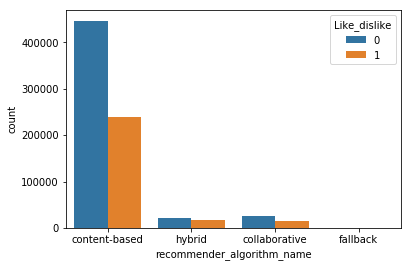

In [57]:
sns.countplot(x='recommender_algorithm_name', hue='Like_dislike', data =df)

[Text(0,0,'HipHop & R&B'),
 Text(0,0,'Dance & Electronic'),
 Text(0,0,'Metal'),
 Text(0,0,'Classical'),
 Text(0,0,'Pop'),
 Text(0,0,'Reggae'),
 Text(0,0,'Speech'),
 Text(0,0,'World'),
 Text(0,0,'Latin'),
 Text(0,0,'Rock'),
 Text(0,0,'Jazz'),
 Text(0,0,'Country')]

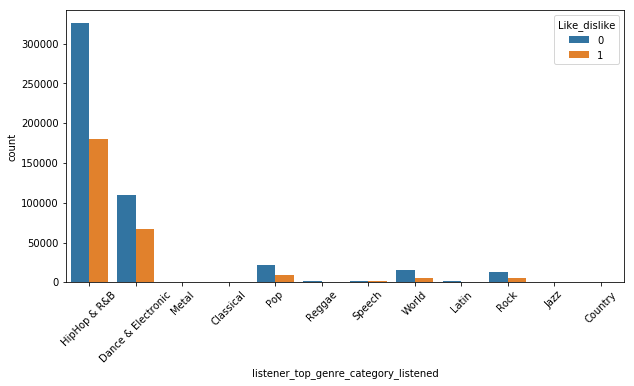

In [64]:
#sns.countplot(x='listener_top_genre_category_listened', hue='Like_dislike', data =df)


plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='listener_top_genre_category_listened',
    hue='Like_dislike'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0,0,'tracks'),
 Text(0,0,'users'),
 Text(0,0,'collection'),
 Text(0,0,'playlists'),
 Text(0,0,'stream'),
 Text(0,0,'you'),
 Text(0,0,'search'),
 Text(0,0,'personal-recommended'),
 Text(0,0,'charts')]

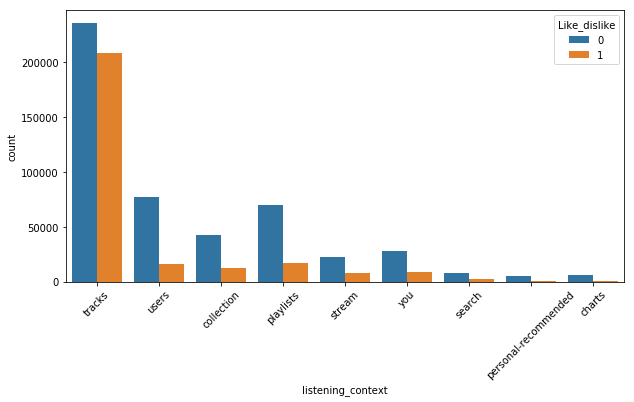

In [63]:
#sns.countplot(x='listening_context', hue='Like_dislike', data =df)

plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='listening_context',
    hue='Like_dislike'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


[Text(0,0,'204.0.20'),
 Text(0,0,'36.0.8'),
 Text(0,0,'204.0.8'),
 Text(0,0,'204.0.0'),
 Text(0,0,'188.0.0'),
 Text(0,0,'36.0.0'),
 Text(0,0,'204.0.16'),
 Text(0,0,'204.0.24'),
 Text(0,0,'36.4.20'),
 Text(0,0,'204.0.12'),
 Text(0,0,'208.0.0'),
 Text(0,0,'196.0.0'),
 Text(0,0,'36.4.16'),
 Text(0,0,'208.0.20'),
 Text(0,0,'204.0.4'),
 Text(0,0,'184.0.0'),
 Text(0,0,'36.0.20'),
 Text(0,0,'44.0.0'),
 Text(0,0,'172.0.0'),
 Text(0,0,'36.4.24'),
 Text(0,0,'36.8.8'),
 Text(0,0,'32.0.12'),
 Text(0,0,'172.0.20'),
 Text(0,0,'28.0.8'),
 Text(0,0,'36.0.4'),
 Text(0,0,'104.12.0'),
 Text(0,0,'200.0.20'),
 Text(0,0,'36.0.12'),
 Text(0,0,'136.0.0'),
 Text(0,0,'168.0.0'),
 Text(0,0,'152.0.0'),
 Text(0,0,'196.0.32'),
 Text(0,0,'180.0.0'),
 Text(0,0,'140.0.0'),
 Text(0,0,'28.0.20'),
 Text(0,0,'188.0.16'),
 Text(0,0,'32.0.8'),
 Text(0,0,'144.0.8'),
 Text(0,0,'176.0.0'),
 Text(0,0,'208.0.24'),
 Text(0,0,'196.0.20'),
 Text(0,0,'24.4.20'),
 Text(0,0,'24.8.20'),
 Text(0,0,'200.0.0'),
 Text(0,0,'176.0.16'),
 Tex

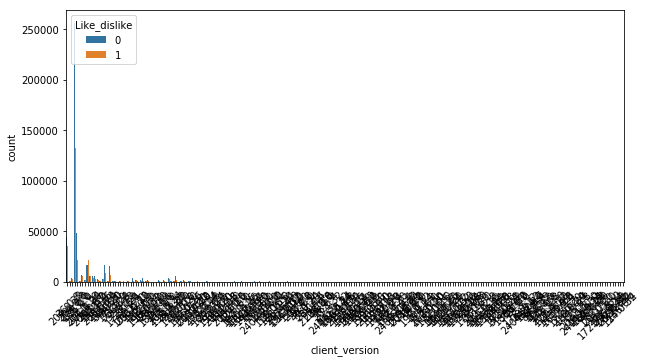

In [164]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='client_version',
    hue='Like_dislike'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [28]:
df.groupby('ts_Month')['listener_prev_month_avg_daily_tracks_listened'].mean()

ts_Month
6    48.943376
7    45.176061
Name: listener_prev_month_avg_daily_tracks_listened, dtype: float64

In [ ]:
df['ts_Month'].unique()

In [29]:
df.groupby('ts_Month')['listener_id'].count()

ts_Month
6    118240
7    709929
Name: listener_id, dtype: int64

In [12]:
df[df['listener_prev_month_listening_time'].isnull()].head()

,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened,ts_Year,ts_Month,ts_Day,ts_Hour
121,2016-06-26 19:12:22,US,36.4.20,tracks,collaborative,eb23bfabf4d46ff4f2fb3e0caedcaea8,Speech,2015-12-15 00:00:00,426781,14721,000475010431369b2de9db784135acd0,2013-11-17 00:00:00,Jazz,NaN,NaN,2016,6,6,19
154,2016-06-26 03:12:38,GB,204.0.0,users,content-based,b8322e103ad39ef30d2b13ea7fc2ac2e,Pop,2016-02-23 00:00:00,371691,17804,000c7ab2b64e766d98a5e174671ef574,2016-04-28 00:00:00,HipHop & R&B,NaN,NaN,2016,6,6,3
182,2016-06-27 16:45:09,US,152.0.32,tracks,content-based,270bd39b2552409581786fa0da861fc9,Dance & Electronic,2016-03-24 00:00:00,557125,557125,00152c7d930da31e8c1b017be89a6109,2015-02-27 00:00:00,Dance & Electronic,NaN,NaN,2016,6,0,16
183,2016-06-27 16:50:28,US,152.0.32,tracks,content-based,26ad976778ddee6a568d9b37fb858b6f,Dance & Electronic,2016-04-15 00:00:00,877704,877704,00152c7d930da31e8c1b017be89a6109,2015-02-27 00:00:00,Dance & Electronic,NaN,NaN,2016,6,0,16
184,2016-06-27 16:58:50,US,152.0.32,tracks,content-based,611fe9765b6fed7c30a4eb588bcc12cd,HipHop & R&B,2016-04-15 00:00:00,744753,744753,00152c7d930da31e8c1b017be89a6109,2015-02-27 00:00:00,Dance & Electronic,NaN,NaN,2016,6,0,16


In [ ]:
df[df['listen_duration']<0]['listener_id'].plot().hist()

print("Negative Listen duration:",df[df['listen_duration']<0]['listener_id'].count())

In [34]:
(df[df['listen_duration']<df['listen_duration'].mean()]['listener_id'].count()/df['listener_id'].count())*100

53.27946349114734

In [ ]:
sns.boxplot(x='listen_duration',y='ts_Month', data=df, palette='winter')
sns.set_style('whitegrid')

In [ ]:
sns.boxplot(x='listen_duration',y='recommender_algorithm_name', data=df, palette='winter')
sns.set_style('whitegrid')

In [ ]:
sns.boxplot(x='listen_duration',y='listener_top_genre_category_listened', data=df, palette='winter')
sns.set_style('whitegrid')